# Classification of iris flowers using a linear classifier

Classification is an important technique in data analysis. For example, one would like to develop a model to classify hand-written characters into one of the alphabets in a language. There are a number of methods for such problems, each can be tailored to the dataset at hand and degree of robustness necessary.

To begin with, we will apply the classification algoritm on the entire dataset without paritioning the data into training and test sets. 

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

In [10]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=0)

In [11]:
#from sklearn.preprocessing import StandardScaler
#
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

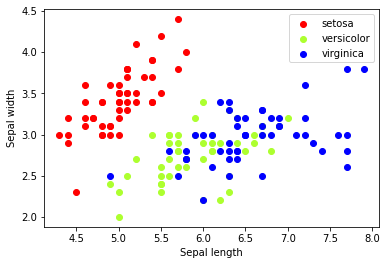

In [12]:
import matplotlib.pyplot as plt
colors=['red','greenyellow','blue']
for i in range(len(colors)):
    xs=x_iris[:,0][y_iris==i]
    ys=x_iris[:,1][y_iris==i]
    plt.scatter(xs,ys,c=colors[i])
plt.figaspect(1.0)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [13]:
from sklearn.linear_model import SGDClassifier
clf_model=SGDClassifier()
clf_model.fit(x_iris[:,0:1], y_iris)

SGDClassifier()

In [14]:
clf_model.coef_

array([[-60.68246764],
       [ 15.30924679],
       [ 55.32345867]])

In [15]:
clf_model.intercept_

array([ 334.29380992,  -40.50576692, -318.69182603])

In [17]:
y_pred=clf_model.predict(x_iris[:,0:1])

In [19]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_iris))

0.5333333333333333


In [22]:
print(metrics.classification_report(y_pred,y_iris))

              precision    recall  f1-score   support

           0       0.40      0.91      0.56        22
           1       0.96      0.42      0.58       115
           2       0.24      0.92      0.38        13

    accuracy                           0.53       150
   macro avg       0.53      0.75      0.51       150
weighted avg       0.82      0.53      0.56       150



In [23]:
print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.40      0.91      0.56        22
  versicolor       0.96      0.42      0.58       115
   virginica       0.24      0.92      0.38        13

    accuracy                           0.53       150
   macro avg       0.53      0.75      0.51       150
weighted avg       0.82      0.53      0.56       150

